In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [72]:
#Standard loading of my dataframe...
target = (r'C:\Users\Erin\BirthNamesData')
filelist=os.listdir(target)
os.chdir(target)
df_list = pd.DataFrame()
for file in filelist:
    foo = pd.read_table(file, header=None, names=['Name','Gender','Count', 'Year'], sep=",")
    foo['Year']=file
    df_list = df_list.append(foo)
df_list['Year'] = df_list['Year'].map(lambda x: x.lstrip('yob').rstrip('.txt'))


In this project, I will look at what effect unpopular/criminal folks have on the popularity of names. The names and time frames I'll be looking at are: 
* Richard, 1950-1980
* Charles, 1950-1980
* Josef, 1920-1960
* Adolf, 1925-1955
* Osama, 1980-present

I am taking a broad time range to capture the general popularity trend of the name before the baddies came along and spoiled it.

In [96]:
dick = (df_list[(df_list.Name == "Richard") & (df_list.Gender == "M")])
dick.head(5) #This made me giggle for about five minutes. 

,Name,Gender,Count,Year
964,Richard,M,728,1880
959,Richard,M,641,1881
1049,Richard,M,746,1882
1074,Richard,M,649,1883
1194,Richard,M,749,1884


* To do: figure out how to make it accept nicknames!

In [80]:
col_titles=["Year", "Count"]
dick = dick.reindex(columns=col_titles)

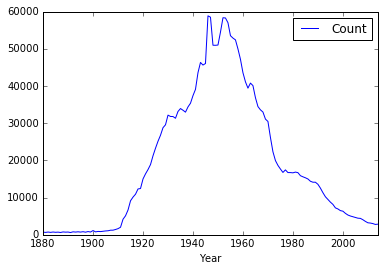

In [81]:
dick.plot(x="Year", y="Count")

So this is what dick looks like (Sorry). Looks like it has a dual peak (or close to it) in the late 40's and early 50's. But not so popular since. 

In [106]:
rng = dick["Year"].map(lambda x: 1950 <= int(x) <= 1980)
tricky = dick[rng]

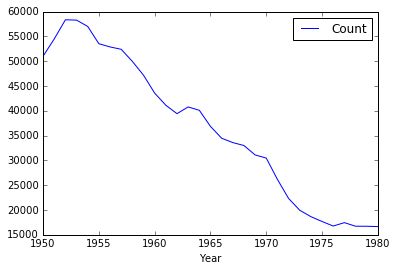

In [107]:
tricky.plot(x="Year",y="Count")

Richard has been declining as a popular name ever since the early 1950's (dick's been getting soft?), but it appears that the rate of decrease got a bit sharper in the early 1970's, when the Watergate hubbub went down. 

*To Do: Calculate first and second derivatives?

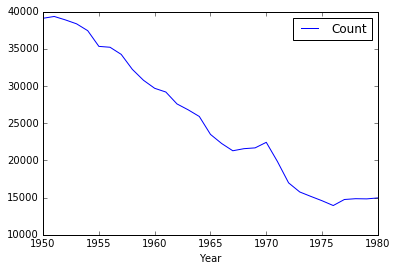

In [98]:
#All right, let's do Charles...
manson =(df_list[(df_list.Name == "Charles") & (df_list.Gender == "M")])
rng = manson["Year"].map(lambda x: 1950 <= int(x) <= 1980)
manson = manson[rng]
manson.plot(x="Year", y="Count")

Charles was rebounding a little until about 1970, when it declined sharply for a few years then stabilized. The Manson murders broke wide open in December 1969. 

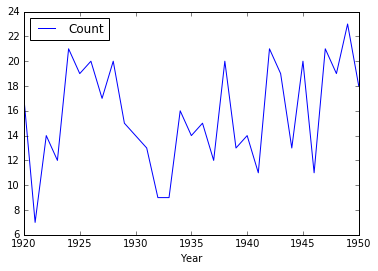

In [101]:
#Josef (that particular spelling)
stalin =(df_list[(df_list.Name == "Josef") & (df_list.Gender == "M")])
rng = stalin["Year"].map(lambda x: 1920 <= int(x) <= 1950)
stalin = stalin[rng]
stalin.plot(x="Year", y="Count")

Not nearly enough of this particular spelling of Josef to draw any conclusions. I wasn't sure there would be, but it was worth a shot. 

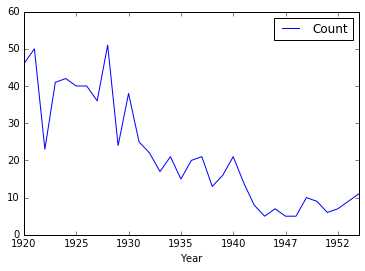

In [102]:
hitler =(df_list[(df_list.Name == "Adolf") & (df_list.Gender == "M")])
rng = hitler["Year"].map(lambda x: 1920 <= int(x) <= 1955)
hitler = hitler[rng]
hitler.plot(x="Year", y="Count")

There appears to be a decline here, but the numbers are too small to begin with. There is a sharp drop about the time the U.S. got into WWII (December 1941). Perhaps if I combined Adolf and Adolph.. 

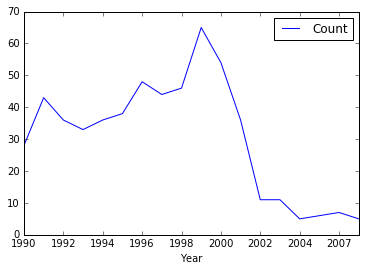

In [103]:
osama =(df_list[(df_list.Name == "Osama") & (df_list.Gender == "M")])
rng = osama["Year"].map(lambda x: 1990 <= int(x) <= 2010)
osama = osama[rng]
osama.plot(x="Year", y="Count")

The initial numbers weren't high to begin with, but there is a large drop after 2001. 